# Alex Germick Midterm Exam Linear Submission
GitHub Link:

In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing

# Import Data and Explore

In [182]:
mpg = pd.read_csv("mpg.csv")

In [183]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [184]:
#Remove non-predictive values and assign Y 
mpg = mpg.drop(['name'], axis=1)
mpg.describe()

,mpg,cylinders,displacement,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


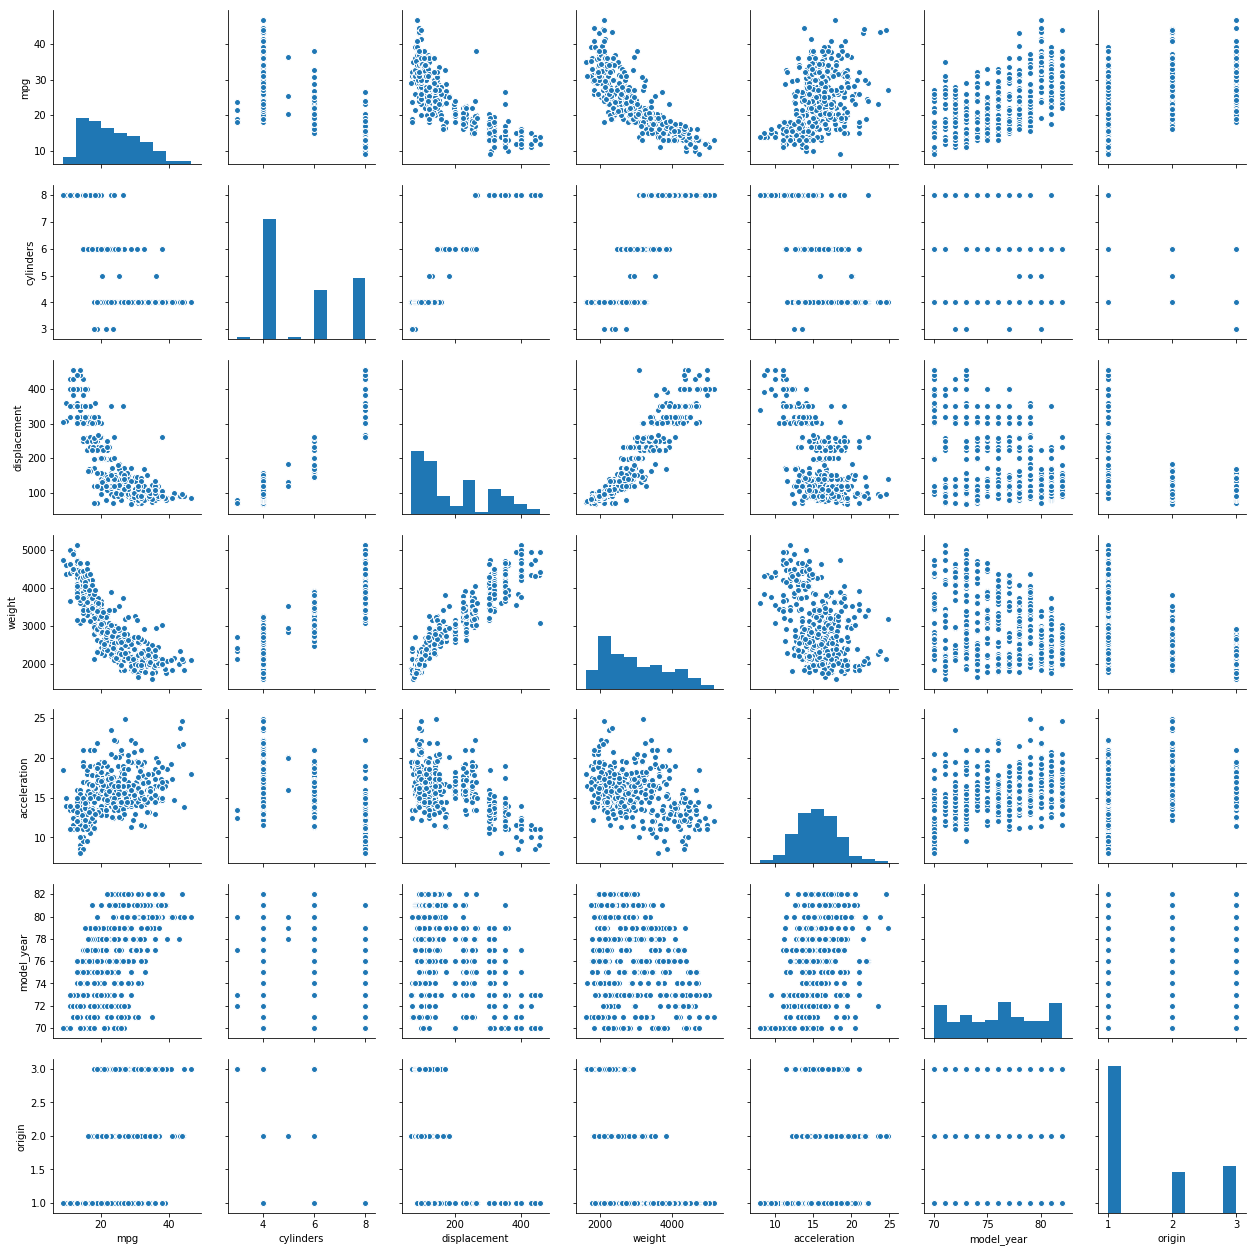

In [185]:
sns.pairplot(mpg)

In [186]:
#Split test and train and assign x/y
x = mpg[['cylinders', 'displacement','weight', 'acceleration', 'model_year', 'origin']]
y = mpg["mpg"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [187]:
#Fit line
lm = LinearRegression()
lm.fit(x_train,y_train)
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [-0.55020598  0.01994642 -0.00707165  0.10005978  0.80339137  1.2038878 ]


Text(0,0.5,'Predicted Y')

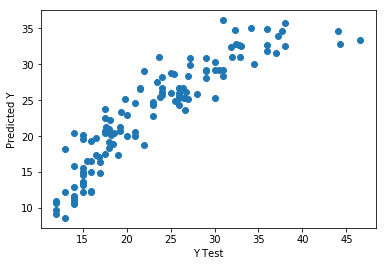

In [188]:
#Check test set
pred = lm.predict(x_test)
plt.scatter(y_test,pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

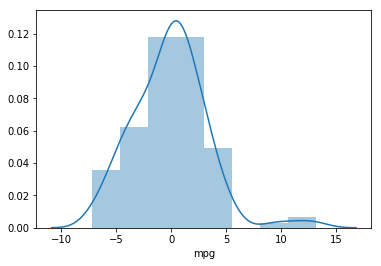

In [189]:
sns.distplot((y_test-pred),bins=8);

In [190]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 2.53118871345
MSE: 11.3888935807
RMSE: 3.37474348369


# Second Model

The first model fit the data reasonably well but not great. Observations with high miles per gallon did not predict well. 

I will try same run with binary variables replacing the categorical variables cylinders & origin.

In [191]:
mpg = pd.read_csv("mpg.csv")
mpg = mpg.drop(['name'], axis=1)
mpg = pd.get_dummies(mpg, columns=["cylinders"])
mpg = pd.get_dummies(mpg, columns=["origin"])
mpg.head()

,mpg,displacement,horsepower,weight,acceleration,model_year,cylinders_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8,origin_1,origin_2,origin_3
0,18.0,307.0,130,3504,12.0,70,0,0,0,0,1,1,0,0
1,15.0,350.0,165,3693,11.5,70,0,0,0,0,1,1,0,0
2,18.0,318.0,150,3436,11.0,70,0,0,0,0,1,1,0,0
3,16.0,304.0,150,3433,12.0,70,0,0,0,0,1,1,0,0
4,17.0,302.0,140,3449,10.5,70,0,0,0,0,1,1,0,0


In [192]:
#Split test and train 

x2 = mpg[['cylinders_3', 'cylinders_4', 'cylinders_5', 'cylinders_6', 'cylinders_8', 'displacement','weight', 'acceleration', 'model_year', 'origin_1', 'origin_2', 'origin_3']]
y2 = mpg["mpg"]

x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.3, random_state=101)

In [193]:
#Fit line
lm = LinearRegression()
lm.fit(x2_train,y2_train)
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [-5.10604976  2.11780423  2.85407215 -0.42509681  0.55927019  0.0198916
 -0.00721135  0.12028446  0.80540087 -1.406484    0.64406782  0.76241619]


Text(0,0.5,'Predicted Y2')

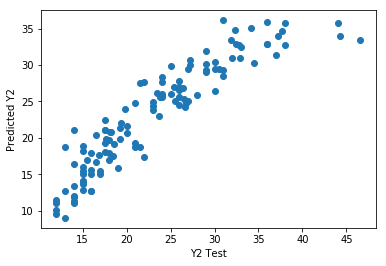

In [194]:
#Check test set vs. first set
pred2 = lm.predict(x2_test)
plt.scatter(y2_test,pred2)
plt.xlabel('Y2 Test')
plt.ylabel('Predicted Y2')

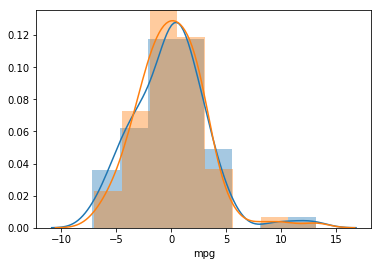

In [195]:
sns.distplot((y_test-pred),bins=8);
sns.distplot((y2_test-pred2),bins=8);

In [197]:
print('MAE:', metrics.mean_absolute_error(y2_test, pred2))
print('MSE:', metrics.mean_squared_error(y2_test, pred2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y2_test, pred2)))

MAE: 2.33033130646
MSE: 9.47243542325
RMSE: 3.07773218836


# Third Model
All three metrics improved after the addition of the binary variables, but heteroskedasticity is still an issue at the higher range of mpg. 

From the pairplot, you can see that displacement and weight may be causing the issue as they don't have a completely linear relationship with mpg. For the third model, we will convert these variables to better fit the data. 

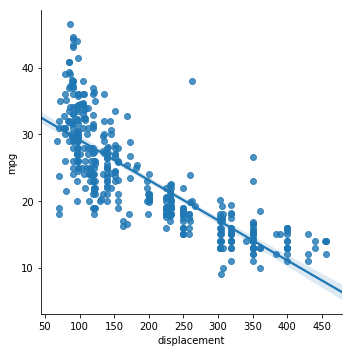

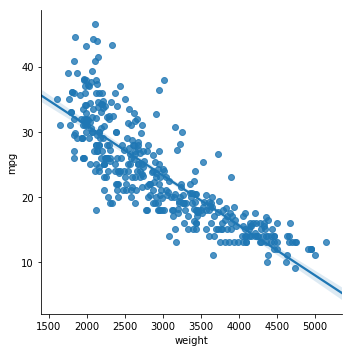

In [198]:
sns.lmplot(x='displacement',y='mpg',data=mpg)
sns.lmplot(x='weight',y='mpg',data=mpg)

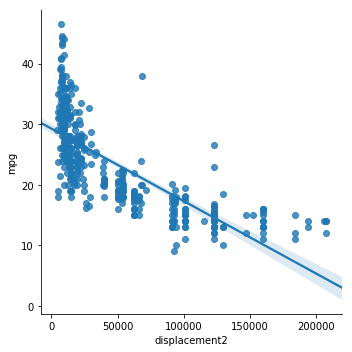

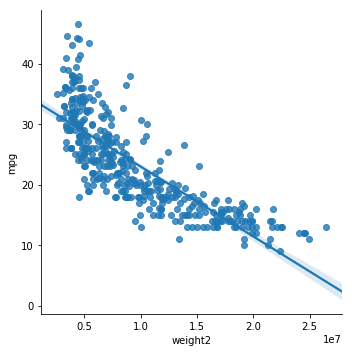

In [199]:
mpg["displacement2"] = mpg["displacement"]*mpg["displacement"]
sns.lmplot(x='displacement2',y='mpg',data=mpg)

mpg["weight2"] = mpg["weight"]*mpg["weight"]
sns.lmplot(x='weight2',y='mpg',data=mpg)

In [200]:
#Split test and train and assign x/y
x3 = mpg[['cylinders_3', 'cylinders_4', 'cylinders_5', 'cylinders_6', 'cylinders_8', 'displacement', 'displacement2','weight','weight2', 'acceleration', 'model_year', 'origin_1', 'origin_2', 'origin_3']]
y3 = mpg["mpg"]

x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=0.3, random_state=101)

In [201]:
#Fit line
lm = LinearRegression()
lm.fit(x3_train,y3_train)
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [ -5.79799961e+00   1.33703321e+00   3.53055172e+00   8.53122986e-01
   7.72916844e-02  -1.20538138e-03   3.00725453e-05  -1.92827574e-02
   1.95056652e-06   9.65085344e-02   8.65432000e-01  -9.44578106e-01
   7.85224549e-01   1.59353558e-01]


Text(0,0.5,'Predicted Y3')

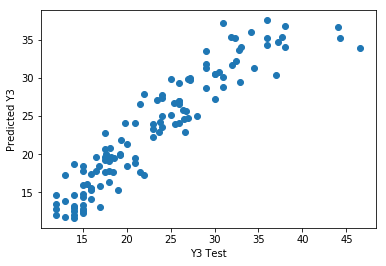

In [202]:
#Check test set vs. first set
pred3 = lm.predict(x3_test)
plt.scatter(y3_test,pred3)
plt.xlabel('Y3 Test')
plt.ylabel('Predicted Y3')

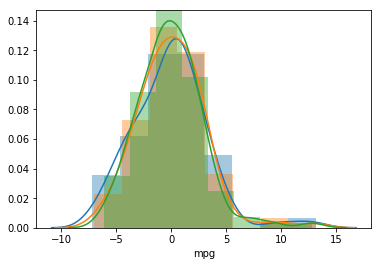

In [203]:
sns.distplot((y_test-pred),bins=8);
sns.distplot((y2_test-pred2),bins=8);
sns.distplot((y3_test-pred3),bins=8);

In [204]:
print('MAE:', metrics.mean_absolute_error(y3_test, pred3))
print('MSE:', metrics.mean_squared_error(y3_test, pred3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y3_test, pred3)))

MAE: 2.21376313495
MSE: 8.54625768766
RMSE: 2.9233983115


# Conclusion

In [205]:
coeffecients = pd.DataFrame(lm.coef_,x3.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
cylinders_3,-5.798000
cylinders_4,1.337033
cylinders_5,3.530552
cylinders_6,0.853123
cylinders_8,0.077292
displacement,-0.001205
displacement2,0.000030
weight,-0.019283
weight2,0.000002
acceleration,0.096509


Cylinders
- The worst cylinder amount was 3 and the best a 5 cylinder car. This could be an anomaly as very few cars had 5 cyclinders. Over 50% of the the observations had 4 cylinders and this was the best out of the popular cylinder amounts.

In [210]:
cylinders = mpg.iloc[:,6:11]
cylinders.describe()

,cylinders_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8
count,398.000000,398.000000,398.000000,398.000000,398.000000
mean,0.010050,0.512563,0.007538,0.211055,0.258794
std,0.099871,0.500471,0.086601,0.408571,0.438523
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


Displacement and Weight
- The heavier the car and the higher the displacement of the engine the lower the predicted miles per gallon. This makes perfect sense as heavier cars with larger engines require more fuel.

Model Year
- The coefficient indicates that the newer the car, the better the miles per gallon. This also makes sense as newer engine technology would have better MPG.

###End###